**MAJOR PROJECT**

**Problem Statement :**  You will be predicting the costs of used cars given the data collected from various sources and distributed across various locations in India.


FEATURES:

Name: The brand and model of the car.

Location: The location in which the car is being sold or is available for purchase.

Year: The year or edition of the model.

Kilometers_Driven: The total kilometres driven in the car by the previous owner(s) in KM.

Fuel_Type: The type of fuel used by the car.

Transmission: The type of transmission used by the car.

Owner_Type: Whether the ownership is Firsthand, Second hand or other.

Mileage: The standard mileage offered by the car company in kmpl or km/kg

Engine: The displacement volume of the engine in cc.

Power: The maximum power of the engine in bhp.

Seats: The number of seats in the car.

New_Price: The price of a new car of the same model.

Price: The price of the used car in INR Lakhs.

* To achieve this, we have to go through the following steps.

**Step1 :** Importing the packages required and importing the given train dataset.

**Step2 :** Splitting the 'Name' into 'Brand','Model','Version'.

**Step3 :** Perform data cleaning such as removing all the null values and replacing it with mean of the particular attribute.

**Step4:**  Encoding the data into algorithm understandable format.

**Step5:**  Importing the given test dataset.

**Step6:**  Training the data with perfect algorithm(*Here we use Multi Linear Regression*).

**Step7:**  Apply the datacleaning and encoding techniques which are applied to train dataset.

**Step8:**  Testing the dataset and predicting the output.

**Step1 :** Importing the packages required and importing the given train dataset.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
%matplotlib inline
dp = pd.read_excel("Data_Train.xlsx")
dp

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [2]:
dp.shape

(6019, 12)

**Step2 :** Splitting the 'Name' into 'Brand','Model','Version'.


In [3]:
dp[['Brand','Model','Version']] = dp['Name'].str.split(' ',2,expand=True)
dp[['mileage', 'Unit1']]= dp['Mileage'].str.split(' ',1,expand=True)
dp[['engine', 'Unit2']]= dp['Engine'].str.split(' ',1,expand=True)
dp[['power', 'Unit3']]= dp['Power'].str.split(' ',1,expand=True)
dp=dp.drop([ 'Unit1', 'Unit2', 'Unit3', 'Mileage', 'Engine', 'Power'], axis=1)

dp.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Seats', 'Price', 'Brand', 'Model',
       'Version', 'mileage', 'engine', 'power'],
      dtype='object')

In [4]:
dp1 = dp[['Name','Brand', 'Model', 'Version', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'mileage', 'engine', 'power', 'Seats',
       'Price']]
dp1

,Name,Brand,Model,Version,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,mileage,engine,power,Seats,Price
0,Maruti Wagon R LXI CNG,Maruti,Wagon,R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Creta,1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,Honda Jazz V,Honda,Jazz,V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50
3,Maruti Ertiga VDI,Maruti,Ertiga,VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Audi,A4,New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Maruti,Swift,VDI,Delhi,2014,27365,Diesel,Manual,First,28.4,1248,74,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Hyundai,Xcent,1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4,1120,71,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Mahindra,Xylo,D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0,2498,112,8.0,2.90
6017,Maruti Wagon R VXI,Maruti,Wagon,R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9,998,67.1,5.0,2.65


In [5]:
dp1=dp1.drop(['Brand','Version','Model' ], axis=1)
dp1

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,mileage,engine,power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4,1248,74,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4,1120,71,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0,2498,112,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9,998,67.1,5.0,2.65


**Step3 :** Perform data cleaning such as removing all the null values and replacing it with mean of the particular attribute.


**Checking for null values in the dataset.**

In [6]:
dp1.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
mileage               2
engine               36
power                36
Seats                42
Price                 0
dtype: int64

**Replacing the null values with the mean of the particular column**

In [7]:

dp1['mileage'] = dp1['mileage'].astype(float)
dp1['mileage'].isnull().sum()



2

In [8]:
dp1['mileage'].mean()

18.134960943992073

In [9]:
dp1['mileage']=dp1['mileage'].replace(np.NaN, dp1['mileage'].mean())
dp1

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,mileage,engine,power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.7,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.8,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248,74,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120,71,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498,112,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998,67.1,5.0,2.65


In [10]:
dp1['engine'] = dp1['engine'].astype(float)
dp1['engine'].isnull().sum()

36

In [11]:
dp1['engine'].mean()

1621.276449941501

In [12]:
dp1['engine']=dp1['engine'].replace(np.NaN, dp1['engine'].mean())
dp1

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,mileage,engine,power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.2,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.7,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.8,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.1,5.0,2.65


In [13]:
dp1['power'].isnull().sum()

36

In [14]:
dp1['power'] = dp1['power'].replace(r'null', np.NaN, regex=True)
dp1['power'] = dp1['power'].astype(float)
dp1['power'].mean()

113.25304969366827

In [15]:
dp1['power']=dp1['power'].replace(np.NaN, dp1['power'].mean())
dp1

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,mileage,engine,power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65


In [16]:
dp1['Seats'].isnull().sum()

42

In [17]:
dp1['Seats'].mean()

5.278735151413753

In [64]:
dp1['Seats']=dp1['Seats'].replace(np.NaN, dp1['Seats'].mean())
dp1

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,mileage,engine,power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65


In [19]:
dp1.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
mileage              0
engine               0
power                0
Seats                0
Price                0
dtype: int64

**Step4:**  Encoding the data into algorithm understandable format.

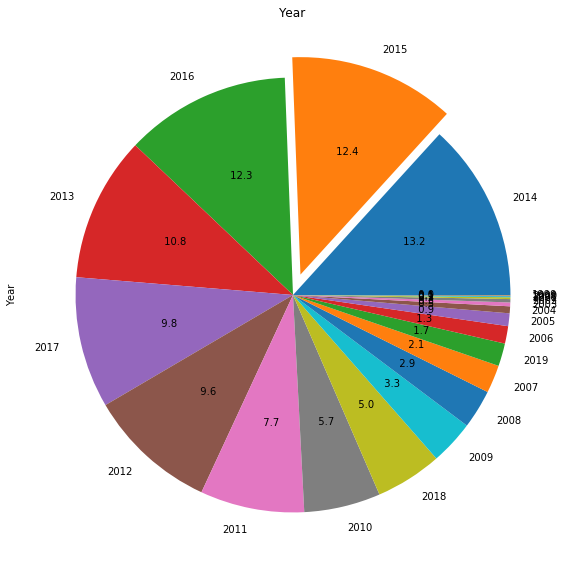

In [20]:
dp1["Year"].value_counts().plot.pie(autopct="%5.1f",  explode=[0,0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], figsize=(10,10))
plt.title("Year")
plt.show()

The above pie chart tells that in the year 2015, 12.4% of cars we sold. 

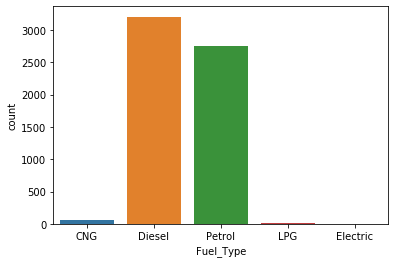

In [21]:
import seaborn as sns

sns.countplot(dp1["Fuel_Type"],label="Count")

By above graph we can tell that 3000+ cars which are ready to sell are of Diesel fuel type.

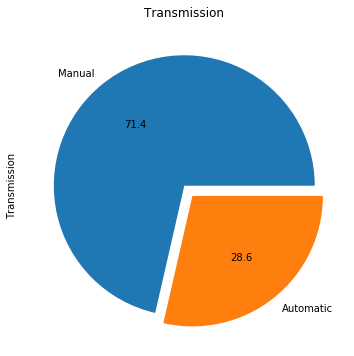

In [22]:
dp1["Transmission"].value_counts().plot.pie(autopct="%1.1f", explode=[0,0.1], figsize=(6,6))
plt.title("Transmission")
plt.show()

By above graph we can tell that 71.4% of the cars are of manula transmiison and remaining(28.6%) are Automatic geared vehicles.

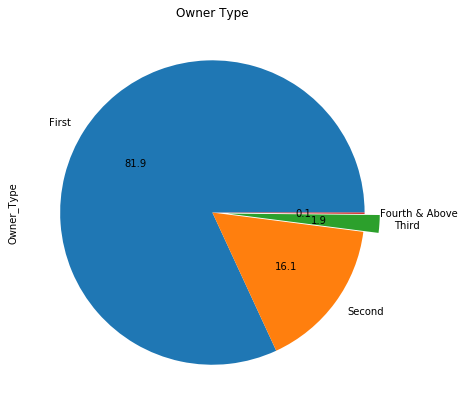

In [23]:
dp1["Owner_Type"].value_counts().plot.pie(autopct="%1.1f", explode=[0,0,0.1,0], figsize=(7,7))
plt.title("Owner Type")
plt.show()

By above graph we can tell that 81.9% of First owner type are ready to sell their cars.

**Using Label Encoder to encode the data**

In [24]:
le = preprocessing.LabelEncoder()

In [25]:
le1 = preprocessing.LabelEncoder()

In [26]:
le2 = preprocessing.LabelEncoder()

In [27]:
le3 = preprocessing.LabelEncoder()

In [28]:
le4 = preprocessing.LabelEncoder()

In [65]:
dp1.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,mileage,engine,power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [29]:
y = dp1.iloc[:,-1:].values
y

array([[ 1.75],
       [12.5 ],
       [ 4.5 ],
       ...,
       [ 2.9 ],
       [ 2.65],
       [ 2.5 ]])

In [30]:
x = dp1.iloc[:,:-1].values
x

array([['Maruti Wagon R LXI CNG', 'Mumbai', 2010, ..., 998.0, 58.16, 5.0],
       ['Hyundai Creta 1.6 CRDi SX Option', 'Pune', 2015, ..., 1582.0,
        126.2, 5.0],
       ['Honda Jazz V', 'Chennai', 2011, ..., 1199.0, 88.7, 5.0],
       ...,
       ['Mahindra Xylo D4 BSIV', 'Jaipur', 2012, ..., 2498.0, 112.0, 8.0],
       ['Maruti Wagon R VXI', 'Kolkata', 2013, ..., 998.0, 67.1, 5.0],
       ['Chevrolet Beat Diesel', 'Hyderabad', 2011, ..., 936.0, 57.6,
        5.0]], dtype=object)

In [31]:
x[:,0]=le.fit_transform(x[:,0])
x

array([[1200, 'Mumbai', 2010, ..., 998.0, 58.16, 5.0],
       [512, 'Pune', 2015, ..., 1582.0, 126.2, 5.0],
       [486, 'Chennai', 2011, ..., 1199.0, 88.7, 5.0],
       ...,
       [932, 'Jaipur', 2012, ..., 2498.0, 112.0, 8.0],
       [1207, 'Kolkata', 2013, ..., 998.0, 67.1, 5.0],
       [165, 'Hyderabad', 2011, ..., 936.0, 57.6, 5.0]], dtype=object)

In [32]:
x[:,1]=le1.fit_transform(x[:,1])
x

array([[1200, 9, 2010, ..., 998.0, 58.16, 5.0],
       [512, 10, 2015, ..., 1582.0, 126.2, 5.0],
       [486, 2, 2011, ..., 1199.0, 88.7, 5.0],
       ...,
       [932, 6, 2012, ..., 2498.0, 112.0, 8.0],
       [1207, 8, 2013, ..., 998.0, 67.1, 5.0],
       [165, 5, 2011, ..., 936.0, 57.6, 5.0]], dtype=object)

In [33]:
x[:,4]=le2.fit_transform(x[:,4])
x

array([[1200, 9, 2010, ..., 998.0, 58.16, 5.0],
       [512, 10, 2015, ..., 1582.0, 126.2, 5.0],
       [486, 2, 2011, ..., 1199.0, 88.7, 5.0],
       ...,
       [932, 6, 2012, ..., 2498.0, 112.0, 8.0],
       [1207, 8, 2013, ..., 998.0, 67.1, 5.0],
       [165, 5, 2011, ..., 936.0, 57.6, 5.0]], dtype=object)

In [34]:
x[:,5]=le3.fit_transform(x[:,5])
x

array([[1200, 9, 2010, ..., 998.0, 58.16, 5.0],
       [512, 10, 2015, ..., 1582.0, 126.2, 5.0],
       [486, 2, 2011, ..., 1199.0, 88.7, 5.0],
       ...,
       [932, 6, 2012, ..., 2498.0, 112.0, 8.0],
       [1207, 8, 2013, ..., 998.0, 67.1, 5.0],
       [165, 5, 2011, ..., 936.0, 57.6, 5.0]], dtype=object)

In [35]:
x[:,6]=le4.fit_transform(x[:,6])
x

array([[1200, 9, 2010, ..., 998.0, 58.16, 5.0],
       [512, 10, 2015, ..., 1582.0, 126.2, 5.0],
       [486, 2, 2011, ..., 1199.0, 88.7, 5.0],
       ...,
       [932, 6, 2012, ..., 2498.0, 112.0, 8.0],
       [1207, 8, 2013, ..., 998.0, 67.1, 5.0],
       [165, 5, 2011, ..., 936.0, 57.6, 5.0]], dtype=object)

**Step5:**  Importing the given test dataset.

In [38]:
x_test=pd.read_excel(r'Data_Test.xlsx ')
x_test

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...
1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0
1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0
1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0
1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0


In [39]:
x_test[['Brand','Model','Version']] = x_test['Name'].str.split(' ',2,expand=True)
x_test[['mileage', 'Unit1']]= x_test['Mileage'].str.split(' ',1,expand=True)
x_test[['engine', 'Unit2']]= x_test['Engine'].str.split(' ',1,expand=True)
x_test[['power', 'Unit3']]= x_test['Power'].str.split(' ',1,expand=True)
x_test=x_test.drop([ 'Unit1', 'Unit2', 'Unit3', 'Mileage', 'Engine', 'Power'], axis=1)

x_test.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Seats', 'Brand', 'Model', 'Version',
       'mileage', 'engine', 'power'],
      dtype='object')

In [40]:
x_test = x_test[['Name','Brand', 'Model', 'Version', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'mileage', 'engine', 'power', 'Seats']]
x_test

,Name,Brand,Model,Version,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,mileage,engine,power,Seats
0,Maruti Alto K10 LXI CNG,Maruti,Alto,K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998,58.2,4.0
1,Maruti Alto 800 2016-2019 LXI,Maruti,Alto,800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7,796,47.3,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Toyota,Innova,Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393,147.8,7.0
3,Toyota Etios Liva GD,Toyota,Etios,Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364,null,5.0
4,Hyundai i20 Magna,Hyundai,i20,Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5,1197,82.85,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,Volkswagen Vento Diesel Trendline,Volkswagen,Vento,Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598,103.6,5.0
1230,Volkswagen Polo GT TSI,Volkswagen,Polo,GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197,103.6,5.0
1231,Nissan Micra Diesel XV,Nissan,Micra,Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461,63.1,5.0
1232,Volkswagen Polo GT TSI,Volkswagen,Polo,GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2,1197,103.6,5.0


In [41]:
x_test=x_test.drop(['Brand','Version','Model'],axis=1)
x_test

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,mileage,engine,power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998,58.2,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7,796,47.3,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393,147.8,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364,null,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5,1197,82.85,5.0
...,...,...,...,...,...,...,...,...,...,...,...
1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598,103.6,5.0
1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197,103.6,5.0
1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461,63.1,5.0
1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2,1197,103.6,5.0


In [42]:
x_test.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
mileage               0
engine               10
power                10
Seats                11
dtype: int64

In [43]:
x_test['engine']=x_test['engine'].astype(float)
x_test['engine'].mean()

1593.5849673202615

In [44]:
x_test['engine'] = dp1['engine'].replace(np.NaN, dp1['engine'].mean())
x_test

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,mileage,engine,power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.2,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7,1582.0,47.3,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,1199.0,147.8,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1248.0,null,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5,1968.0,82.85,5.0
...,...,...,...,...,...,...,...,...,...,...,...
1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1199.0,103.6,5.0
1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1364.0,103.6,5.0
1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,2179.0,63.1,5.0
1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2,1120.0,103.6,5.0


In [45]:
x_test['power'] = x_test['power'].replace(r'null', np.NaN, regex=True)
x_test['power'] = x_test['power'].astype(float)
x_test['power'].mean()

110.38042013311168

In [46]:
x_test['power'] = dp1['power'].replace(np.NaN, dp1['power'].mean())
x_test

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,mileage,engine,power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.16,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7,1582.0,126.20,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,1199.0,88.70,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1248.0,88.76,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5,1968.0,140.80,5.0
...,...,...,...,...,...,...,...,...,...,...,...
1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1199.0,79.40,5.0
1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1364.0,86.79,5.0
1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,2179.0,140.00,5.0
1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2,1120.0,71.00,5.0


In [47]:
x_test['Seats'].mean()

5.28454619787408

In [48]:
x_test['Seats']=dp1['Seats'].replace(np.NaN, dp1['Seats'].mean())
x_test

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,mileage,engine,power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.16,5.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7,1582.0,126.20,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,1199.0,88.70,5.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1248.0,88.76,7.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5,1968.0,140.80,5.0
...,...,...,...,...,...,...,...,...,...,...,...
1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1199.0,79.40,5.0
1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1364.0,86.79,5.0
1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,2179.0,140.00,7.0
1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2,1120.0,71.00,5.0


In [49]:
x_test.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
mileage              0
engine               0
power                0
Seats                0
dtype: int64

**Step6:**  Training the data with perfect algorithm  (  **Here we use Multi Linear Regression**  ).

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
mr = LinearRegression()

*Fitting x,y values to the algorithm*

In [52]:
mr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Step7:**  Apply the datacleaning and encoding techniques which are applied to train dataset.

In [53]:
x_test = x_test.iloc[::].values

In [54]:
    x_test[:,0]=le.fit_transform(x_test[:,0])
    x_test

array([[413, 'Delhi', 2014, ..., 998.0, 58.16, 5.0],
       [408, 'Coimbatore', 2013, ..., 1582.0, 126.2, 5.0],
       [723, 'Mumbai', 2017, ..., 1199.0, 88.7, 5.0],
       ...,
       [582, 'Kolkata', 2012, ..., 2179.0, 140.0, 7.0],
       [745, 'Pune', 2013, ..., 1120.0, 71.0, 5.0],
       [536, 'Kochi', 2014, ..., 2143.0, 204.0, 5.0]], dtype=object)

In [55]:
x_test[:,1]=le.fit_transform(x_test[:,1])
x_test

array([[413, 4, 2014, ..., 998.0, 58.16, 5.0],
       [408, 3, 2013, ..., 1582.0, 126.2, 5.0],
       [723, 9, 2017, ..., 1199.0, 88.7, 5.0],
       ...,
       [582, 8, 2012, ..., 2179.0, 140.0, 7.0],
       [745, 10, 2013, ..., 1120.0, 71.0, 5.0],
       [536, 7, 2014, ..., 2143.0, 204.0, 5.0]], dtype=object)

In [56]:
x_test[:,4]=le.fit_transform(x_test[:,4])
x_test

array([[413, 4, 2014, ..., 998.0, 58.16, 5.0],
       [408, 3, 2013, ..., 1582.0, 126.2, 5.0],
       [723, 9, 2017, ..., 1199.0, 88.7, 5.0],
       ...,
       [582, 8, 2012, ..., 2179.0, 140.0, 7.0],
       [745, 10, 2013, ..., 1120.0, 71.0, 5.0],
       [536, 7, 2014, ..., 2143.0, 204.0, 5.0]], dtype=object)

In [57]:
x_test[:,5]=le.fit_transform(x_test[:,5])
x_test

array([[413, 4, 2014, ..., 998.0, 58.16, 5.0],
       [408, 3, 2013, ..., 1582.0, 126.2, 5.0],
       [723, 9, 2017, ..., 1199.0, 88.7, 5.0],
       ...,
       [582, 8, 2012, ..., 2179.0, 140.0, 7.0],
       [745, 10, 2013, ..., 1120.0, 71.0, 5.0],
       [536, 7, 2014, ..., 2143.0, 204.0, 5.0]], dtype=object)

In [58]:
x_test[:,6]=le.fit_transform(x_test[:,6])
x_test

array([[413, 4, 2014, ..., 998.0, 58.16, 5.0],
       [408, 3, 2013, ..., 1582.0, 126.2, 5.0],
       [723, 9, 2017, ..., 1199.0, 88.7, 5.0],
       ...,
       [582, 8, 2012, ..., 2179.0, 140.0, 7.0],
       [745, 10, 2013, ..., 1120.0, 71.0, 5.0],
       [536, 7, 2014, ..., 2143.0, 204.0, 5.0]], dtype=object)

**Step8:**  Testing the dataset and predicting the output.

In [67]:
y_predict = mr.predict(x_test)

In [60]:
y_predict

array([[ 1.7525174 ],
       [ 8.77403671],
       [10.52304647],
       ...,
       [ 8.85066832],
       [ 4.17818172],
       [26.39713953]])

y_predict is prediction of the price of the old cars.

**STORING THE PREDICTD VALUES IN AN EXCEL SHEET**:

In [61]:
pred1 = pd.DataFrame(y_predict, columns=['Price']).to_excel('car_predict.xlsx')

In [62]:
data1 = pd.read_excel('car_predict.xlsx')
data1

,Unnamed: 0,Price
0,0,1.752517
1,1,8.774037
2,2,10.523046
3,3,2.178526
4,4,12.161398
...,...,...
1229,1229,2.799000
1230,1230,8.944727
1231,1231,8.850668
1232,1232,4.178182


**Percentage of Acuracy level of the algorithm**

In [63]:
print(mr.score(x_test, y_predict))

1.0
